# Politica $\epsilon$-greedy

Ya hemos visto que la politica $\epsilon-greedy$ consiste en la dualidad aplicar-aprender, con una probabilidad $1-\epsilon$ para la mejor accion posible dentro de lo aprendido y con una probabilidad $\epsilon$ de realizar una accion aleatoria.

Intuitivamente vemos que al principio del aprendizaje el valor de $\epsilon$ debería ser muy alto, o directamente 1, para que sea mas probable que el agente realice una accion aleatoria para explorar el entorno. Mientras el agente va aprendiendo, $\epsilon$ debe ir reduciendo su valor para que sea cada vez mas probable que el agente realice la mejor accion.

Veamos ahora una funcion lineal que modele el comportamiento del valor de $\epsilon$, aunque podriamos utilizar otro tipo de funciones como por ejemplo una exponencial.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# funcion lineal 

class DecayLineal(object):
    def __init__(self, valor_ini, valor_final, pasos_max):
        assert valor_ini>valor_final, 'valor inicial > valor final'
        self.valor_ini=valor_ini
        self.valor_final=valor_final
        self.decay=(valor_ini-valor_final)/pasos_max

    def __call__(self, num_pasos):
        valor_actual=self.valor_ini-self.decay*num_pasos
        if valor_actual<self.valor_final:
            valor_actual=self.valor_final
        return valor_actual

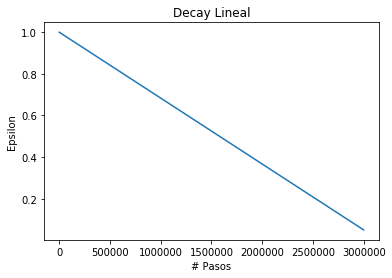

In [3]:
epsilon_inicial=1.0
epsilon_final=0.05

MAX_NUM_EPISODIOS=10000
MAX_PASOS_POR_EPISODIO=300


lineal=DecayLineal(valor_ini=epsilon_inicial,
                   valor_final=epsilon_final,
                   pasos_max=MAX_NUM_EPISODIOS*MAX_PASOS_POR_EPISODIO)

epsilon=[lineal(e) for e in range(MAX_NUM_EPISODIOS*MAX_PASOS_POR_EPISODIO)]
plt.plot(epsilon)
plt.xlabel('# Pasos')
plt.ylabel('Epsilon')
plt.title('Decay Lineal')
plt.show();